Importar la librería necesaria para manipular datasets que en este caso es pandas

In [18]:
import pandas as pd

Asignación de variable que contenga el acceso a mi archivo csv

In [19]:
data = pd.read_csv("2titanic.csv")

In [20]:
type(data)

pandas.core.frame.DataFrame

Voy usar la función "head" de pandas que imprime los primeros 5 renglones de mi dataset 

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


El objeto data tiene un argumento "shape" que me da el numero de columnas y renglones

In [22]:
data.shape

(891, 12)

Count es una función que me permite saber cuantos elementos hay en cada columna

In [23]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Una manera para ver cuántos elementos me faltan en cada columna

In [24]:
col_names = data.columns.tolist() #Convierte las columnas de mi dataset en una lista y guardalas en la variable col_names
col_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [25]:
for column in col_names: #Por cada nombre de columna en mi lista de nombres de columnas haz las siguientes lineas de codigo
    print("Valores nulos en", column, ": ", data[column].isnull().sum())

Valores nulos en PassengerId :  0
Valores nulos en Survived :  0
Valores nulos en Pclass :  0
Valores nulos en Name :  0
Valores nulos en Sex :  0
Valores nulos en Age :  177
Valores nulos en SibSp :  0
Valores nulos en Parch :  0
Valores nulos en Ticket :  0
Valores nulos en Fare :  0
Valores nulos en Cabin :  687
Valores nulos en Embarked :  2


Transformar para que la columna sex en lugar de decir male o female diga M o F

In [26]:
d = {'male': 'M', 'female':'F'}
data['Sex'] = data['Sex'].apply(lambda x:d[x])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S


voy a empezar a analizar las edades


La funcion describe me permite ver la estadistica descriptiva de las columnas númericas

In [27]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Cuántas o cuáles personas se subieron sin pagar?

In [28]:
data[data.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",M,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",M,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",M,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",M,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",M,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",M,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",M,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",M,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",M,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",M,NaN,0,0,112052,0.0,NaN,S


In [29]:
#Tabla cruzada entre supervivencia y sexo
pd.crosstab(data.Survived, data.Sex)

Sex,F,M
Survived,,
0,81,468
1,233,109


Agrupamer los datos por clase y sexo, después solo presentame la suma de los que sobrevivieron

In [31]:
pclass_sex_survival_count_df = data.groupby(['Pclass','Sex'])['Survived'].sum()
pclass_sex_survival_count_df

Pclass  Sex
1       F      91
        M      45
2       F      70
        M      17
3       F      72
        M      47
Name: Survived, dtype: int64

In [32]:
#Tabla cruzada entre Pclass y sexo
pd.crosstab(data.Pclass, data.Sex)

Sex,F,M
Pclass,,
1,94,122
2,76,108
3,144,347


In [33]:
#Importar la librería para graficar
import matplotlib.pyplot as plt

In [34]:
#Generar un canvas o lienzo vacio
fig = plt.figure(figsize=(30,10))

<Figure size 2160x720 with 0 Axes>

Gráfica de la columna survived

Text(0.5, 1.0, 'Sobrevivieron - cuenta total')

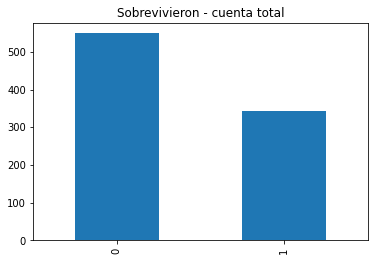

In [35]:
data.Survived.value_counts().plot(kind = 'bar')
plt.title("Sobrevivieron - cuenta total")

Gráfica de la columna survived por porcentajes

Text(0.5, 1.0, 'Sobrevivieron - porcentaje total')

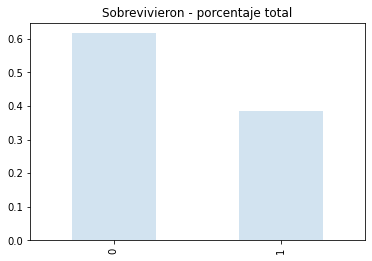

In [38]:
data.Survived.value_counts(normalize = True).plot(kind = 'bar', alpha = 0.2)
plt.title("Sobrevivieron - porcentaje total")

Gráfica de sexo y survided en totales

Text(0.5, 1.0, 'Sobrevivieron totales - M vs F')

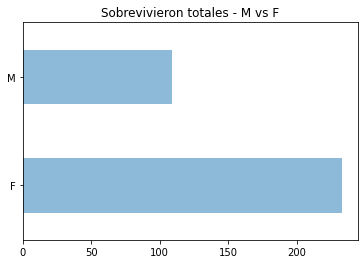

In [40]:
data.Sex[data.Survived == 1].value_counts().plot(kind = 'barh', alpha = 0.5)
plt.title('Sobrevivieron totales - M vs F')

Gráfica de sexo y survived en porcentajes

Text(0.5, 1.0, 'Sobrevivieron porcentajes - M vs F')

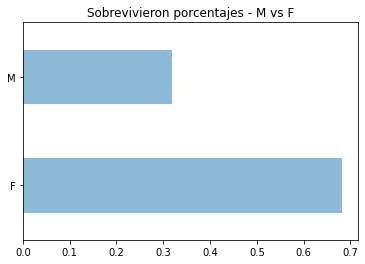

In [41]:
data.Sex[data.Survived == 1].value_counts(normalize = True).plot(kind = 'barh', alpha = 0.5)
plt.title('Sobrevivieron porcentajes - M vs F')

Gráfica por clase de ticket en totales

Text(0.5, 1.0, 'Sobrevivientes por clase - Totales')

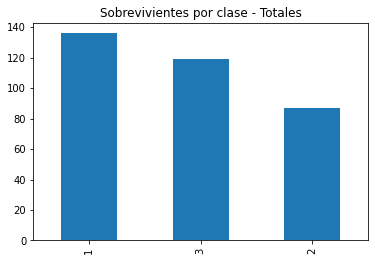

In [42]:
data.Pclass[data.Survived == 1].value_counts().plot(kind='bar')
plt.title('Sobrevivientes por clase - Totales')

Gráfica por clase de ticket en porcentajes

Text(0.5, 1.0, 'Sobrevivientes por clase - Porcentajes')

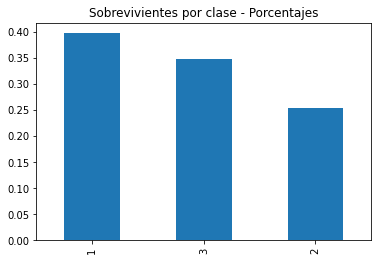

In [43]:
data.Pclass[data.Survived == 1].value_counts(normalize = True).plot(kind='bar')
plt.title('Sobrevivientes por clase - Porcentajes')

Gráfica clase porcentajes pastel

Text(0.5, 1.0, 'Sobrevivientes por clase - Porcentajes')

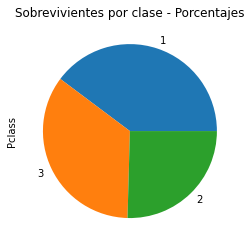

In [44]:
data.Pclass[data.Survived == 1].value_counts(normalize = True).plot(kind='pie')
plt.title('Sobrevivientes por clase - Porcentajes')

Gráfica clase porcentajes linea (En este caso, o conjunto de datos o situación no es ideal)

Text(0.5, 1.0, 'Sobrevivientes por clase - Porcentajes')

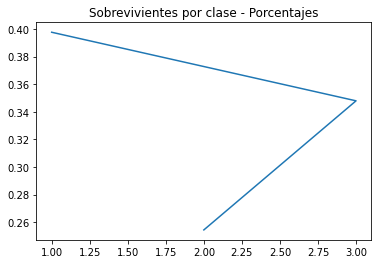

In [45]:
data.Pclass[data.Survived == 1].value_counts(normalize = True).plot(kind='line')
plt.title('Sobrevivientes por clase - Porcentajes')

Revisar si hay relación entre tipo de ticket y edad

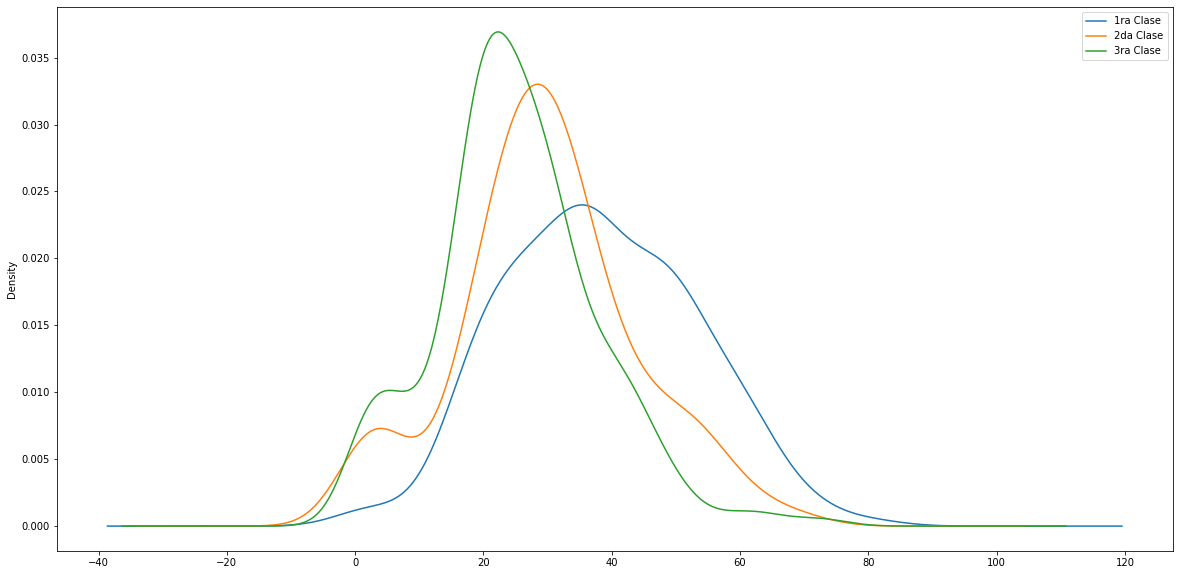

In [49]:
fig = plt.figure(figsize=(20,10))
for clase in [1,2,3]:
    data.Age[data.Pclass == clase].plot(kind="kde")
    
plt.legend(("1ra Clase","2da Clase","3ra Clase"))

Cuántas personas iban a bordo, menores de 1 año

In [50]:
data[data.Age < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",M,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",M,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",F,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",F,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",M,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",M,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",M,0.83,1,1,29106,18.7500,NaN,S
